In [1]:
import matplotlib.pyplot as plt

import numpy as np
import os
from ctd.comparison.analysis.tt.tt import Analysis_TT 
from ctd.comparison.analysis.dt.dt import Analysis_DT
# Import pca
import dotenv
from ctd.comparison.comparison import Comparison

dotenv.load_dotenv(dotenv.find_dotenv())

True

In [2]:
HOME_DIR = os.environ['HOME_DIR']
print(HOME_DIR)

pathTT = HOME_DIR + 'content/trained_models/task-trained/20240328_NBFF_GRU_Final/n=3 max_epochs=1500 seed=0/'
an_TT = Analysis_TT(run_name = "TT", filepath = pathTT)

path_NODE_Sweep = pathTT + "20240410_NBFF_NODE_DT_LatentSweep_new/"
subfolders_NODE = [f.path for f in os.scandir(path_NODE_Sweep) if f.is_dir()]

/home/csverst/Github/CtDBenchmark/


In [3]:
print(len(subfolders_NODE))

16


In [4]:
comparison = Comparison()
comparison.load_analysis(an_TT, reference_analysis=True, group = "TT")
for subfolder in subfolders_NODE:
    latent_size = int(subfolder.split(" ")[-1].split("=")[-1])
    print(latent_size)
    subfolder = subfolder + "/"
    analysis_temp = Analysis_DT(run_name = f"NODE_{latent_size}", filepath = subfolder, model_type = "SAE")
    comparison.load_analysis(analysis_temp, group = f"NODE_{latent_size}")

comparison.regroup()

10
8
5
3
8
8
8
3
10
10
5
3
3
5
5
10


Working on 1 of 17
Working on 2 of 17
Working on 3 of 17
Working on 4 of 17
Working on 5 of 17
Working on 6 of 17
Working on 7 of 17
Working on 8 of 17
Working on 9 of 17
Working on 10 of 17
Working on 11 of 17
Working on 12 of 17
Working on 13 of 17
Working on 14 of 17
Working on 15 of 17
Working on 16 of 17
Working on 17 of 17


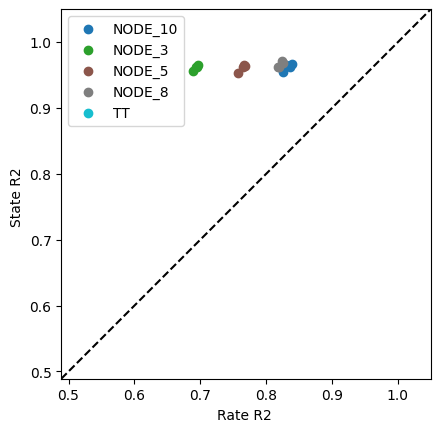

In [8]:
comparison.compare_state_rate_r2(num_pcs=4)

In [6]:

sims = comparison.compare_dynamics_DSA()


KeyboardInterrupt: 

In [ ]:
# Take upper triangle of sims
sims = np.triu(sims, k=0)
sims = sims.flatten()
self_sim = sims[0]
sims = sims[1:]
fig = plt.figure()
plt.bar(range(len(sims)), sims)
plt.title("Dynamical Similarity")
plt.xlabel("Model")
plt.ylabel("Similarity")
plt.xticks(range(len(sims)), ["GRU", "Vanilla", "NODE"])    

comparison.compare_to_reference_affine